### Dataset 

#### UpdatedResumeDataset.csv

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:
df = pd.read_csv("UpdatedResumeDataSet.csv")
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


### Seperate input and output data

In [5]:
X = df["Resume"]
y = df["Category"]

### Exploratory data Analysis

In [6]:
len(set(y))

25

<Axes: xlabel='count', ylabel='Category'>

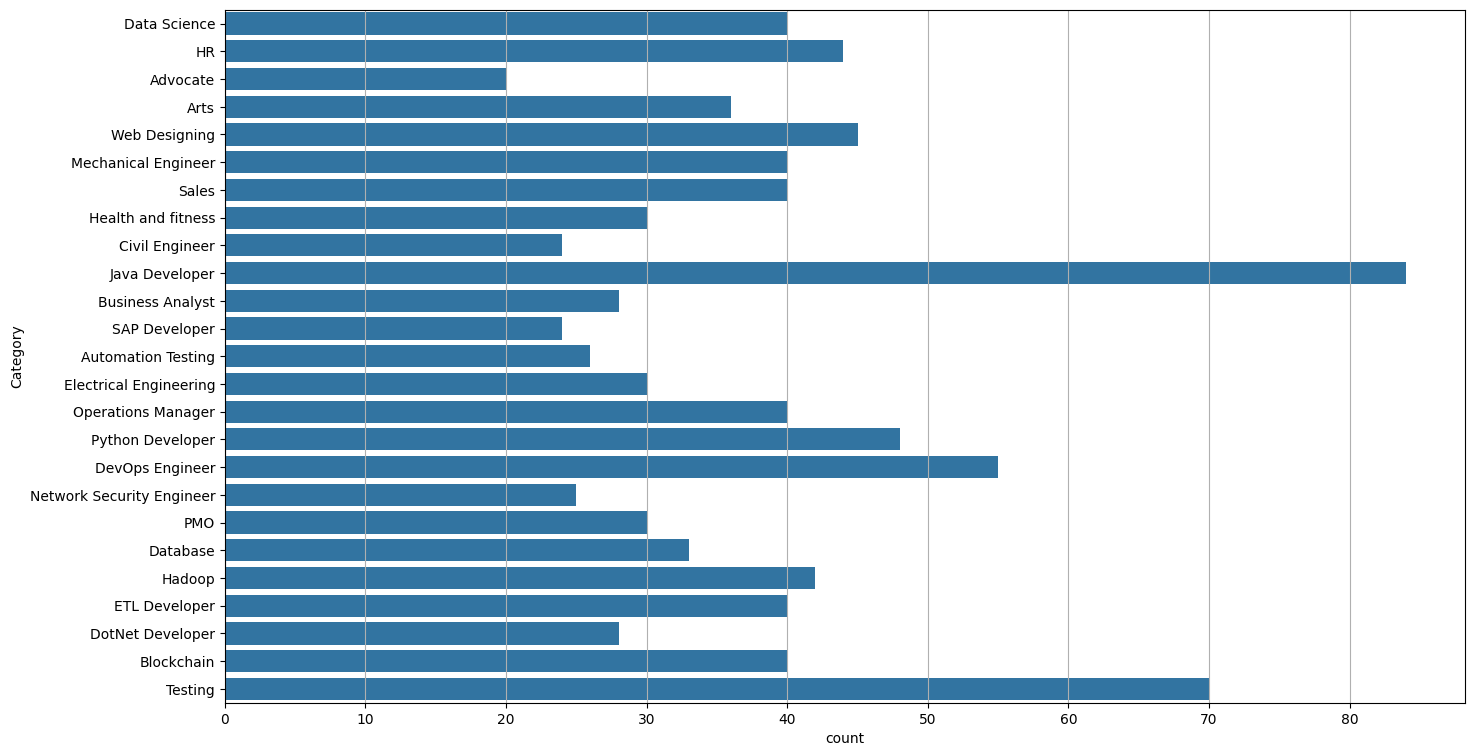

In [8]:
plt.figure(figsize = (16,9))
plt.grid()
sns.countplot(y)

In [9]:
y.value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

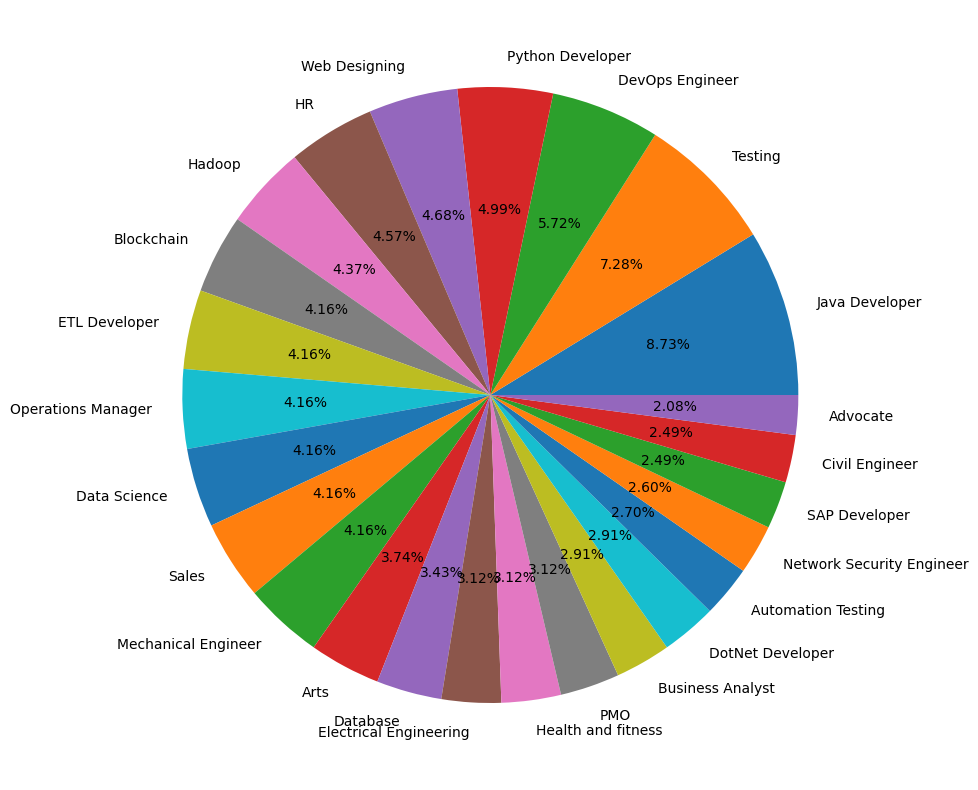

In [12]:
plt.figure(figsize = (10,10))
plt.pie(y.value_counts(), labels = y.value_counts().index, autopct = '%2.2f%%');

In [16]:
java = X[y=='Java Developer']
java

319    Education Details \r\nAugust 2010 to May 2017 ...
320    Technical Skills (Trained / Project Acquired S...
321    TECHNICAL SKILLS Skills: Java, SQL, PL/SQL, C,...
322    TECHNICAL STRENGTHS Computer Language Java/J2E...
323    Education Details \r\nJanuary 2013 Master of E...
                             ...                        
398    Computer Skills: Languages And Script: JSP, Se...
399    Education Details \r\nJanuary 2016 B.E Informa...
400    TECHNICAL SKILLS Programming Languages: Java (...
401    SKILLS: - 1) Team leading 2) Self-motivated 3)...
402    Skills â¢ Language: Java â¢ Operating System...
Name: Resume, Length: 84, dtype: object

In [17]:
from nltk.tokenize import word_tokenize

In [18]:
java = " ".join(java)  ### Combining all resumes
java = word_tokenize(java)
java

['Education',
 'Details',
 'August',
 '2010',
 'to',
 'May',
 '2017',
 'BE',
 'Electronics',
 '&',
 'Communication',
 'Jabalpur',
 ',',
 'Madhya',
 'Pradesh',
 'Takshshila',
 'institute',
 'of',
 'technology',
 'Java',
 'developer',
 'Skill',
 'Details',
 'Java',
 ',',
 'Javascript',
 ',',
 '-',
 'Exprience',
 '-',
 '6',
 'monthsCompany',
 'Details',
 'company',
 '-',
 'Wab',
 'It',
 'Softwere',
 'Pvt',
 '.',
 'Ltd.',
 'description',
 '-',
 'Jr.',
 'Java',
 'Developer',
 'Technical',
 'Skills',
 '(',
 'Trained',
 '/',
 'Project',
 'Acquired',
 'Skills',
 ')',
 'â\x80¢',
 'Languages',
 'Known',
 ':',
 'C',
 ',',
 'C++',
 ',',
 'J2EE',
 ',',
 'Spring',
 ',',
 'Hibernate',
 '.',
 'â\x80¢',
 'Testing',
 ':',
 'Functional',
 'Testing',
 ',',
 'Manual',
 'Testing',
 '.',
 'â\x80¢',
 'Operating',
 'Systems',
 ':',
 'Windows',
 '&',
 'Linux',
 '.',
 'â\x80¢',
 'Packages',
 ':',
 'MS-office',
 '.',
 'â\x80¢',
 'Databases',
 ':',
 'My',
 'SQL',
 '&',
 'PostgreSQL.Education',
 'Details',
 'Januar

In [19]:
from wordcloud import WordCloud

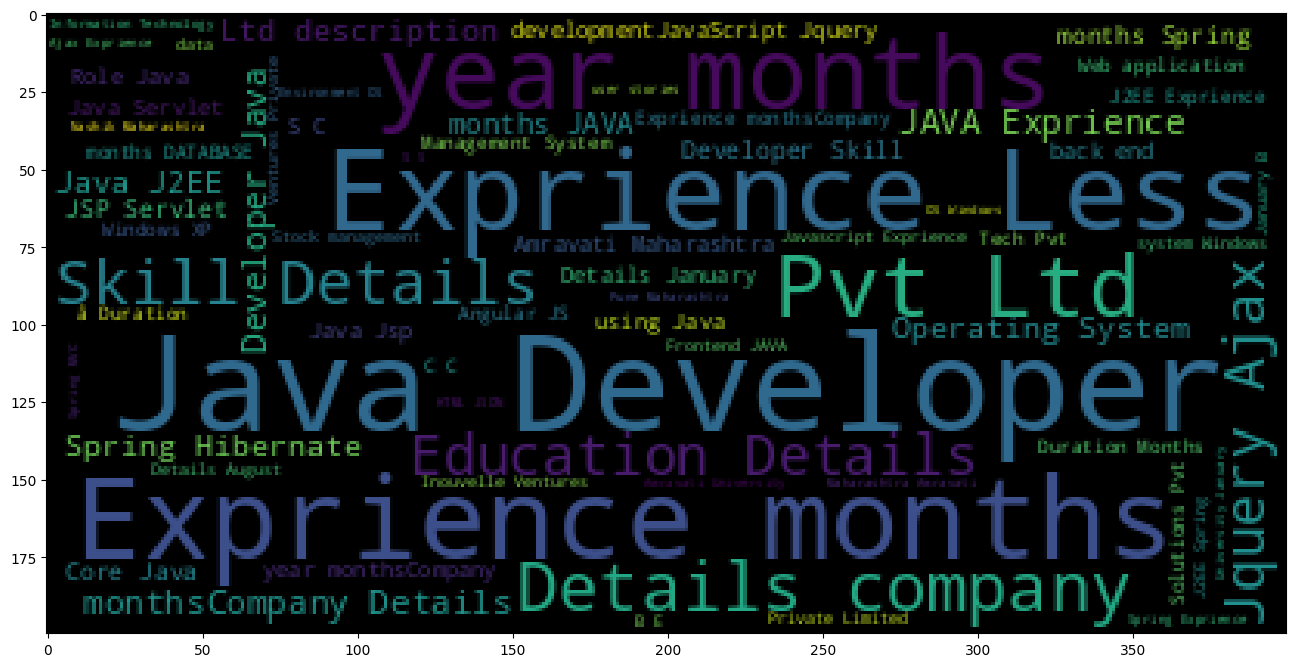

In [21]:
wc = WordCloud().generate(' '.join(java))
plt.figure(figsize = (16,9))
plt.imshow(wc)

In [23]:
print('hello hi\rworld') ## Rewrite the line from start

world


In [24]:
X[123]

"â\x80¢ Operating Systems: Windows XP / Vista / 07Education Details \r\nJanuary 2018 M.F.A painting Nagpur, Maharashtra Nagpur University\r\nJanuary 2016 B.F.A. Painting Nagpur, Maharashtra Nagpur University\r\nJanuary 2012 Diploma Art  Maharashtra State Board\r\nJanuary 2010 H.S.C.   Maharashtra State Board\r\nJanuary 2008 S.S.C.   Maharashtra State Board\r\nFine arts lecturer \r\n\r\n\r\nSkill Details \r\nMs-Cit- Exprience - 96 monthsCompany Details \r\ncompany - Shubhankan Fine Arts College, indore\r\ndescription - â\x80¢ I'm doing a job as a Lecturer in Shubhankan Fine Arts College Indore from Nov 2018.\r\nâ\x80¢ I'm an Artist, completed ATD, BFA and MFA in painting. \r\nâ\x80¢ I'm searching for a job in my faculty in my area and comfort place. To improve my knowledge and experience in this field.\r\ncompany - \r\ndescription - I have a experience of classes of painting, rangoli, drawing, summer classes, etc\r\n\r\nHealth: Physical Disability ( Orthopedically)"

In [29]:
import re, string

In [46]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText) ## Remove URls
    resumeText = re.sub('RT|cc', ' ', resumeText)    ## Remove RT and cc
    resumeText = re.sub('#\S+', ' ', resumeText)    ## Remove hashtags
    resumeText = re.sub('@\S+', ' ', resumeText)    ## Remove mentions
    resumeText = re.sub('[%s]' % re.escape(string.punctuation), ' ', resumeText)   ## Remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]', r' ', resumeText)    ## Remove everything else 
    resumeText = re.sub('\s+', ' ', resumeText)   ## Remove extra white space     
    return resumeText

In [47]:
cleanResume(X[123])

' Operating Systems Windows XP Vista 07Education Details January 2018 M F A painting Nagpur Maharashtra Nagpur University January 2016 B F A Painting Nagpur Maharashtra Nagpur University January 2012 Diploma Art Maharashtra State Board January 2010 H S C Maharashtra State Board January 2008 S S C Maharashtra State Board Fine arts lecturer Skill Details Ms Cit Exprience 96 monthsCompany Details company Shubhankan Fine Arts College indore description I m doing a job as a Lecturer in Shubhankan Fine Arts College Indore from Nov 2018 I m an Artist completed ATD BFA and MFA in painting I m searching for a job in my faculty in my area and comfort place To improve my knowledge and experience in this field company description I have a experience of classes of painting rangoli drawing summer classes etc Health Physical Disability Orthopedically '

In [48]:
cleaned = X.apply(cleanResume)
cleaned

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

### TF*IDF vectorize

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
tfv = TfidfVectorizer(stop_words = 'english')

In [51]:
x_new = tfv.fit_transform(cleaned)
x_new

<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

In [52]:
tfv.get_feature_names_out()

array(['000', '01', '017', ..., 'zone', 'zookeeper', 'zz'], dtype=object)

### Cross Validation

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
### seperate the training and testing data
X_train, X_test, y_train, y_test = train_test_split(x_new, y, random_state = 0, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((721, 7351), (241, 7351), (721,), (241,))

### Build model

In [55]:
from sklearn.neighbors import NearestCentroid

In [56]:
nn = NearestCentroid()

In [57]:
nn.fit(X_train, y_train)

NearestCentroid()

### Performance Evaluation

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [61]:
y_pred = nn.predict(X_test)
y_pred

array(['DevOps Engineer', 'Hadoop', 'Electrical Engineering', 'Sales',
       'Network Security Engineer', 'Database', 'Java Developer',
       'Civil Engineer', 'Hadoop', 'Java Developer', 'Automation Testing',
       'Java Developer', 'Health and fitness', 'Health and fitness',
       'Blockchain', 'Civil Engineer', 'Blockchain', 'DevOps Engineer',
       'Mechanical Engineer', 'Python Developer', 'DotNet Developer',
       'Network Security Engineer', 'Electrical Engineering', 'HR',
       'Operations Manager', 'Python Developer', 'Testing',
       'Web Designing', 'HR', 'SAP Developer', 'Electrical Engineering',
       'Health and fitness', 'Arts', 'Network Security Engineer',
       'Health and fitness', 'Java Developer', 'Business Analyst',
       'Web Designing', 'Health and fitness', 'Testing', 'Java Developer',
       'Java Developer', 'Mechanical Engineer', 'Java Developer',
       'Hadoop', 'Blockchain', 'Java Developer', 'DotNet Developer',
       'Sales', 'Testing', 'Web D

In [62]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print( confusion_matrix(y_test, y_pred))

Accuracy : 0.9875518672199171
[[ 5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
   0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
   0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   1]
 [ 0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0

In [63]:
print(classification_report(y_test, y_pred))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         5
                     Arts       1.00      1.00      1.00         9
       Automation Testing       1.00      0.83      0.91         6
               Blockchain       1.00      1.00      1.00        10
         Business Analyst       1.00      1.00      1.00         7
           Civil Engineer       1.00      1.00      1.00         6
             Data Science       1.00      0.90      0.95        10
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         7
            ETL Developer       1.00      1.00      1.00        10
   Electrical Engineering       1.00      1.00      1.00         8
                       HR       1.00      1.00      1.00        11
                   Hadoop       1.00      1.00      1.00     

### Validation

In [74]:
valid = open("Sample_resume.txt") 
text = valid.read()
text

'Tejashree Pishe \nJr. Machine Learning Engineer. (MITU Research) \nEXPERIENCE \nMITU Research, New Sangavi, Pune \n Feb 2021 till date \nHiko Technology Pvt. Ltd., Baner, Pune Full Time Internship \nAugust 2019 May 2020. \n \nKEY PROJECTS \nPredictive Analytics Implemented for Pistachio Types over quality parameter database\nStudy the origin, trade business and nutritional values over Pistachio types.\nReview the quality of pistachio types over its quality  \npararameters.\nCritically evaluate and data preprocessing over the database.\nUsed the Resampling techniques to work on imbalanced data set.\nIdentify the quality parameters which has more impact on classification of Pistachio types by quantitative analysis.\nFind out the best suitable algorithm with more than 90% accuracy to predict the type of pistachio over new data.\nUpdating and upgrading the model with non-predictable data.\nTechnologies: Python for Data Science, NumPY, Panda,\nMachine Learning Algorithms \n \nDesign and de

In [76]:
text = cleanResume(text)
x_valid = tfv.transform([text])
nn.predict(x_valid)

array(['Data Science'], dtype=object)